<a href="https://colab.research.google.com/github/susridhanyamenon/colab/blob/main/empyrial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install empyrial

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52 kB 523 kB/s 
     |████████████████████████████████| 61 kB 144 kB/s 
     |████████████████████████████████| 52 kB 559 kB/s 
     |████████████████████████████████| 41 kB 109 kB/s 
     |████████████████████████████████| 261 kB 42.7 MB/s 
     |████████████████████████████████| 1.6 MB 9.8 MB/s 
     |████████████████████████████████| 16.9 MB 5.8 MB/s 
     |████████████████████████████████| 62 kB 669 kB/s 
  Created wheel for empyrical: filename=empyrical-0.5.5-py3-none-any.whl size=39778 sha256=70cd2b5a70ed20f8e4dbd0fd9efbb0e9370be1d6a6e822a4c8cc7ad624140db7
  Stored in directory: /root/.cache/pip/wheels/0d/68/bb/926065fb744e7d7cb67334cb1a9c696722abc8303e5dc9a8d0
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40721 sha256=9e0d50ad7efe5765951826e8facbeb3c8341a6f54f62b39cd77b0b65575cdb8c
  Stored in directory: /root/.cache

In [ ]:
#portfolio: AAPL, HPQ, CVX, C, AON, BK, TSM, UPS, KO, MSFT, ATVI, AMZN, JNJ, PFE, MKL, MCO, VZ, MCKM, MCD, WMT

Start date: 2021-01-01
End date: 2022-01-01


,Backtest
,
Annual return,26.94%
Cumulative return,26.82%
Annual volatility,11.38 %
Winning day ratio,56.97%
Sharpe ratio,2.15
Calmar ratio,5.33
Information ratio,-0.0
Stability,0.89
Max Drawdown,-5.11 %


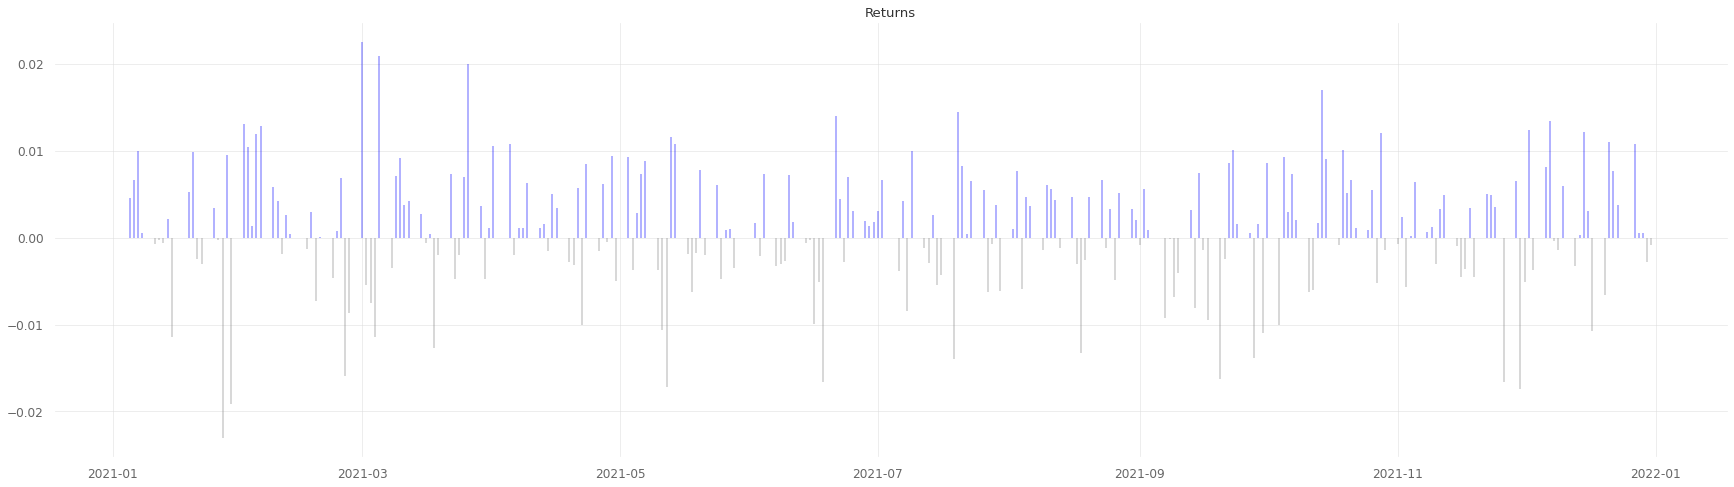

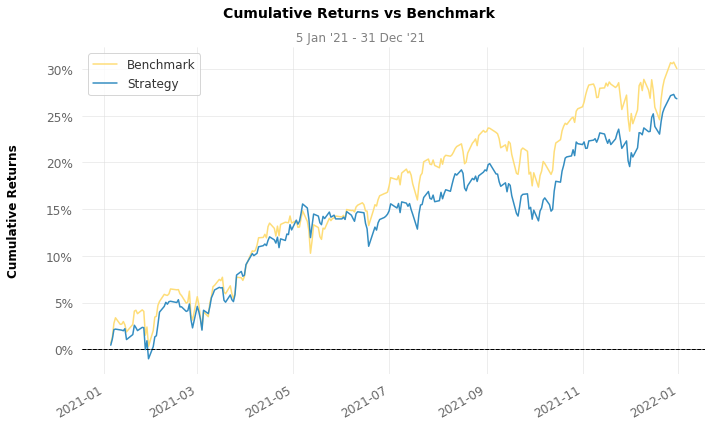

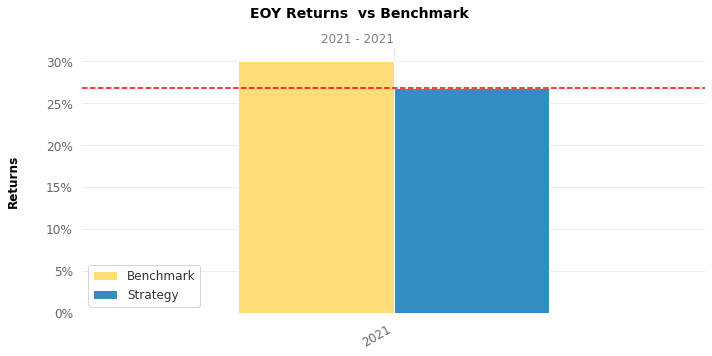

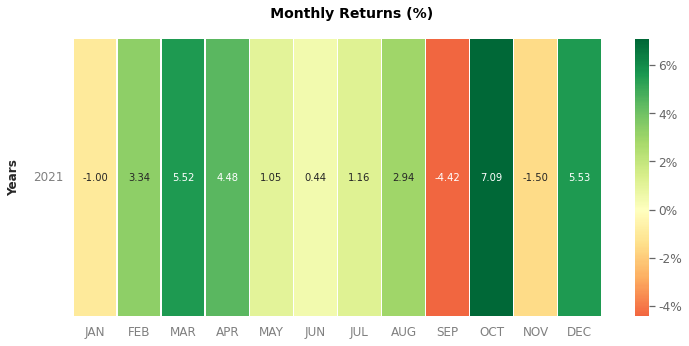

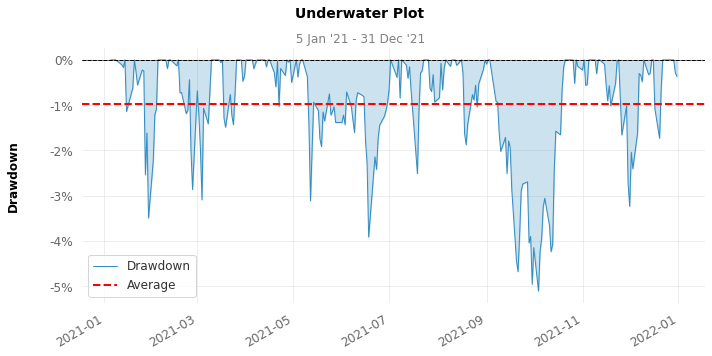

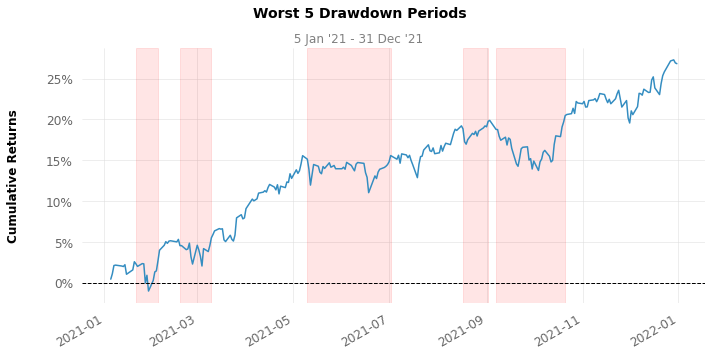

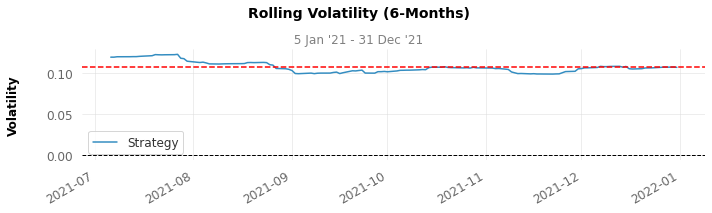

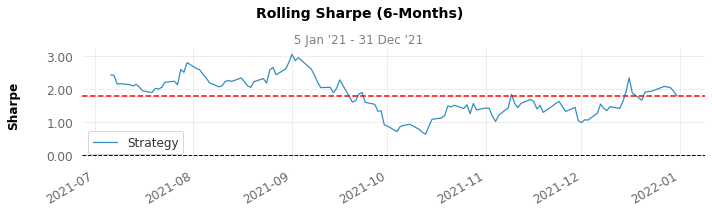

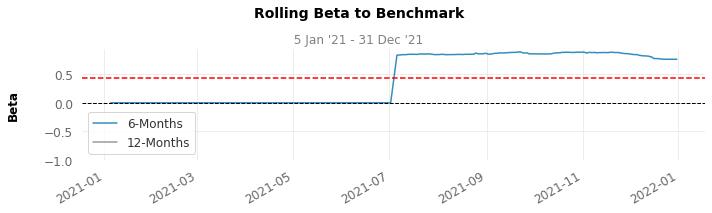

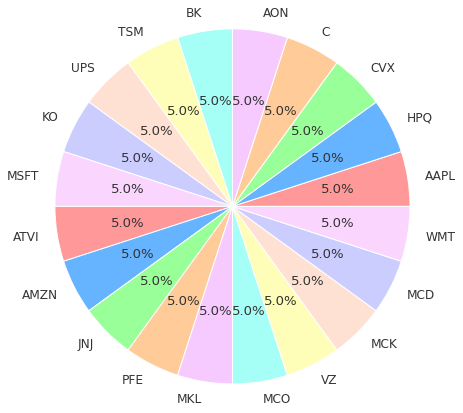

(None, None, None, None, None, None, None, None, None)

In [ ]:
from empyrial import empyrial, Engine

portfolio = Engine(
    start_date = "2021-01-01",
    end_date = "2022-01-01",
    portfolio = ["AAPL","HPQ","CVX","C","AON","BK","TSM","UPS","KO","MSFT","ATVI","AMZN","JNJ","PFE","MKL","MCO","VZ","MCK","MCD","WMT"],
)

empyrial(portfolio)

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
'''
? Take the average of a large number of iterations?

Interesting link between liberty of choice and return (draw a frontier maybe?) -> seems like the bigger the higher is the return
0.2 -> ok
0.3 -> good
0.4 -> wow
0.5 -> ok

Or prove that in average it beats the market
1) Does it beat the market on average? Look over 10y
2) Compare it to other optimization techniques such as equal weighting, mean variance, efficient frontier, hierarchical risk parity, efficient frontier, CLA
'''

In [ ]:
import random
import datetime as dt
import yfinance as yf

In [ ]:
9.29%
29.35%

In [ ]:
def get_returns(stocks, wts, start_date, end_date=dt.date.today()):
    if len(stocks) > 1:
        assets = yf.download(stocks, start=start_date, end=end_date, progress=False)["Adj Close"]
        assets = assets.filter(stocks)
        ret_data = assets.pct_change()[1:]
        returns = (ret_data * wts).sum(axis=1)
        return returns
    else:
        df = yf.download(stocks, start=start_date, end=end_date, progress=False)["Adj Close"]
        df = pd.DataFrame(df)
        returns = df.pct_change()
        return returns

In [ ]:
def generate_weights():
    while True:
        weights = [random.uniform(0.001, 0.4) for i in range(19)]
        weights.append(1 - sum(weights))
        if -1 <= weights[-1] <= 20:
            return weights

In [ ]:
date = ["2000-01-01","2001-01-01","2002-01-01","2003-01-01","2004-01-01","2005-01-01","2006-01-01","2007-01-01","2008-01-01","2009-01-01","2010-01-01","2011-01-01","2012-01-01","2013-01-01","2014-01-01","2015-01-01","2016-01-01","2017-01-01","2018-01-01","2019-01-01","2020-01-01","2021-01-01","2022-01-01"]

In [ ]:
for i in range(0,22):
  print(date[i])
  print(date[i+1])
  print("\n")

In [ ]:
portfolio = ["AAPL","HPQ","CVX","C","AON","BK","TSM","UPS","KO","MSFT","ATVI","AMZN","JNJ","PFE","MKL","MCO","VZ","MCK","MCD","WMT"]
date = ["2000-01-01","2001-01-01","2002-01-01","2003-01-01","2004-01-01","2005-01-01","2006-01-01","2007-01-01","2008-01-01","2009-01-01","2010-01-01","2011-01-01","2012-01-01","2013-01-01","2014-01-01","2015-01-01","2016-01-01","2017-01-01","2018-01-01","2019-01-01","2020-01-01","2021-01-01","2022-01-01"]


yrly_ave = []
for i in range(0,22):
  print(date[i])
  print(date[i+1])
  print("\n")
  perf = []
  for i in range(0,1):
      weight = generate_weights()
      df = get_returns(portfolio, weight, date[i],date[i+1])
      creturns = (df + 1).cumprod()
      perf.append(creturns[-1])
      ave = (sum(perf)/len(perf)-1)*100
      yrly_ave.append(ave)

2000-01-01
2001-01-01


2001-01-01
2002-01-01


2002-01-01
2003-01-01


2003-01-01
2004-01-01


2004-01-01
2005-01-01


2005-01-01
2006-01-01


2006-01-01
2007-01-01


2007-01-01
2008-01-01


2008-01-01
2009-01-01


2009-01-01
2010-01-01


2010-01-01
2011-01-01


2011-01-01
2012-01-01


2012-01-01
2013-01-01


2013-01-01
2014-01-01


2014-01-01
2015-01-01


2015-01-01
2016-01-01


2016-01-01
2017-01-01


2017-01-01
2018-01-01


2018-01-01
2019-01-01


2019-01-01
2020-01-01


2020-01-01
2021-01-01


2021-01-01
2022-01-01




In [ ]:
yrly_ave

[4.096473727585148,
 -12.30977197111538,
 -17.370041295165162,
 -9.00577854809036,
 8.353295809555195,
 -3.4889164097933745,
 -18.937331845830474,
 -6.7769097123156925,
 -34.451970336807015,
 -16.19013982719233,
 -2.2153025908613233,
 -16.084001167276096,
 -8.632922573220547,
 13.527665258793387,
 -30.11921167335484,
 15.599050999496145,
 -36.29992403177531,
 3.930366381565187,
 -26.291676129557107,
 -32.11267999655738,
 -17.33199991294272,
 -4.48903447753406]

In [ ]:
yrly_ave

[-10.099050521561514,
 -21.157842244947357,
 -7.3917922740441515,
 -2.7543688539334643,
 -14.139334942506688,
 -18.77934331076724,
 3.321190918250627,
 -17.2463337198541,
 -4.104296900428173,
 -11.868670786359626,
 -9.534826587594713,
 11.639129449599995,
 24.976714164484104,
 4.561821008604294,
 10.119539586921068,
 -13.870397378708411,
 -14.864920097777556,
 -12.363535916014701,
 -25.327812282529205,
 -11.768998786020536,
 -19.014086784828464,
 -7.465338154652423]